# LeNet复现

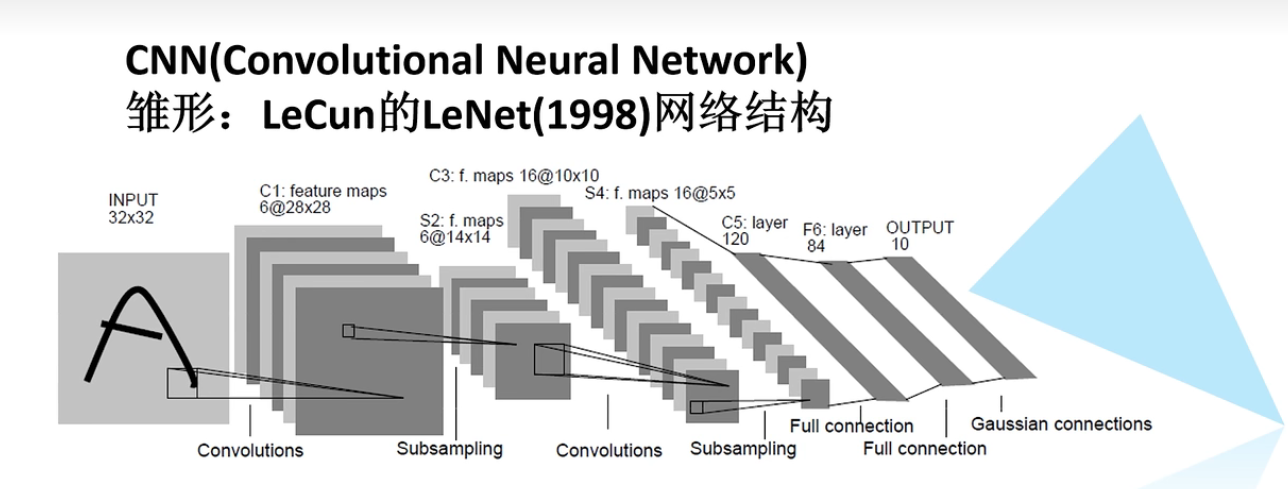

In [9]:
import torch.nn as nn
import torch.nn.functional as F

#### 函数Conv2d的参数：
Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

#### 函数MaxPool2d的参数：
MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

In [10]:
class LeNet(nn.Module): #定义一个类，继承nn.Module类
    # 初始化函数，网络结构
    # First is initializing the layers that we are going to use in our CNN inside __init__
    # 先是初始化图层，我们将在我们的 CNN 中使用 _ _ init _ _
    def __init__(self):
        super(LeNet, self).__init__()
        # 以下内容就相当于定义熟悉
        # 定义第一层卷积
        self.conv1 = nn.Conv2d(3,16,5) # 第一个参数是卷积核的channel数，第二个参数是卷积核的数目，第三个参数是卷积核尺寸5×5
        self.pool1 = nn.MaxPool2d(2,2) # 第一个参数是池化核的kernel_size，第二个参数是stride（stride默认为1）
        self.conv2 = nn.Conv2d(16,32,5)
        self.pool2 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(32*5*5,120) # 第一个全连接层，输入节点个数为32*5*5，输出节点个数为120
        self.fc2 = nn.Linear(120,84)# 第二个全连接层，输入节点个数为120，输出节点个数为84
        self.fc3 = nn.Linear(84,10)# 第三个全连接层，输入节点个数为84，输出节点个数为10

In [17]:
    # the other is to define the sequence in which those layers will process the image. This is defined inside the forward function.
    # 另一个是定义这些图层处理图像的顺序(也就是正向传播过程)。这是在 forward 函数中定义的
    # x就是输入的数据，类型为pytorch tensor: [batch,channel,height,width]
    def forward(self,x):
        # F.relu的含义是卷积之后使用relu激活函数，然后再进行池化操作
        x = F.relu(self.conv1(x)) # input(3,32,32) output(16,28,28)  28=(32-5+2*0)/1+1=28
        x = self.pool1(x)         # input(16,28,28) output(16,14,14)
        x = F.relu(self.conv2(x)) # input(16,14,14) output(32,10,10) 10=(14-5+2*0)/1+1=10
        x = self.pool2(x)         # input(32,10,10) output(32,5,5)
        x = x.view(-1,32*5*5)     # output(32*5*5) view函数作用是展平成一维的,第一个参数是batch,这里设为-1表示让程序自动推理出batch,
        x = F.relu(self.fc1(x))   #input(32*5*5) output(120)
        x = F.relu(self.fc2(x))   #iutput(120) output(84)
        x = self.fc3(x)           #input(84) output(10) 10的含义是10个类别
        return x

#### 解释一下output(16,28,28)这几个数字
16是因为kernel_size=16，所以output的channel为16
28是输出图片宽高，根据下面的公式可以知道，(32-5+2*0)/1+1=28

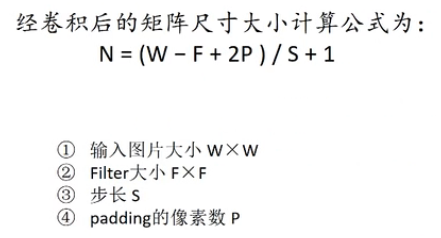

#### 解释一下output(16,14,14)这几个数字 
16是因为输入图片的channel为16
14是因为池化核的kernel_size=2,stride=2

In [ ]:
# 可以创建个随机变量，然后测试一下
import torch
input1 = torch.rand([32, 3, 32, 32])
model = LeNet()
print(model)
output = model(input1)